# Homework 2 - Convolutional Neural Networks

### Deep Learning in Medicine - Spring 2025



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex

**See:** <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction:** Upload and Submit a zipped folder named netid_hw2 consisting of your final jupyter notebook and necessary files in <a href='https://brightspace.nyu.edu/d2l/home/427921'>Brightspace</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Saturday March 20rd, 2025**

### Topics & weightage -


1.   Convolutions (30)
2.   Network design (15)
3.   Literature review (19)
4.   Deep CNN design for disease classification (36)
5.   Analysis of Results (5)
6.   Bonus Questions (12) - optional!



## Question 1 Convolutions (Total 30 points)

### 1.1 Convolutions from **scratch** for image processing (11 points)

In [2]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [6]:
# functions to plot images
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

#### 1.1.a (1 point)

In [4]:
# TODO: load any image of your choice and display (plot) the resized image (224*224) in grayscale using the plot_image function
# or you can also utilize the sample image provided --> cat.png
# (none of these transformations are mandatory, but they make our job a bit easier, 
# as there’s only one color channel to apply convolution to)

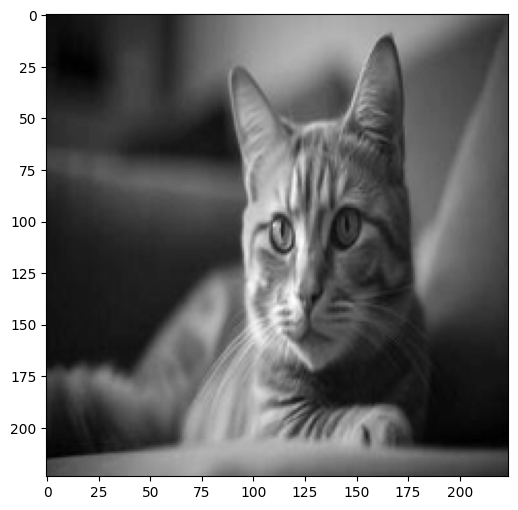

In [ ]:

# Load the image (replace 'cat.png' with your image file if using a different one)
image_path = "cat.png"  # Change this to the path of your image if needed
image = Image.open(image_path)

# Convert to grayscale
image_gray = ImageOps.grayscale(image)

# Resize to 224x224
image_resized = image_gray.resize((224, 224))

# Convert to numpy array
image_array = np.array(image_resized)

# Display the image
plot_image(image_array)

In [10]:
# defining filters 
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

#### 1.1.b (1.5 points)

In [92]:
def calculate_target_size(img_size: int, kernel_size: int) -> tuple:
  
  size = img_size - kernel_size + 1

  return size, size

print("The dimensions of the picture after convolution:", calculate_target_size(224, 3))  # Expected output: (222, 222)

The dimensions of the picture after convolution: (222, 222)


#### 1.1.c (3 points)

In [51]:
def convolve(img: np.array, kernel: np.array) -> np.array:

    size_of_target = calculate_target_size(img.shape[0], kernel.shape[0])
    matrix_of_zeroes = np.zeros(size_of_target)

    for i in range(size_of_target[0]):
        for j in range(size_of_target[0]):
            # Extract the region of the image that matches the kernel size
            img_patch = img[i:i+kernel.shape[0], j:j+kernel.shape[0]]
            
            # Perform element-wise multiplication and sum the result
            convolved_value = np.sum(img_patch * kernel)
            
            # Store the computed value in the output image
            matrix_of_zeroes[i, j] = convolved_value

    return matrix_of_zeroes


#### 1.1.d (0.5 point)

In [8]:
# TODO: use the convolved function & the sharpen filter to obtain a sharpened image of your original input 
# TODO: print the sharpened image array named img_sharpened
# TODO: use the plot_two_images function to plot the original image and sharpened image side by side

Sharpened image array:
 [[15. 15. 15. ... 64. 53. 56.]
 [14. 14. 14. ... 58. 43. 56.]
 [17. 17. 17. ... 50. 45. 52.]
 ...
 [66. 65. 73. ... 57. 51. 50.]
 [52. 58. 55. ... 48. 49. 49.]
 [75. 68. 73. ... 47. 41. 41.]]


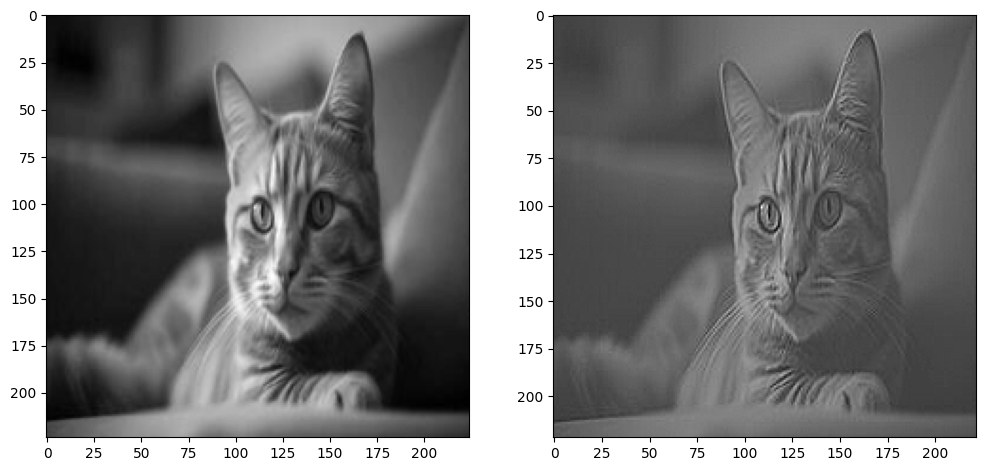

In [35]:
img_sharpened = convolve(image_array, sharpen)
print("Sharpened image array:\n", img_sharpened)

plot_two_images(image_array, img_sharpened)

#### 1.1.e (0.5 point)

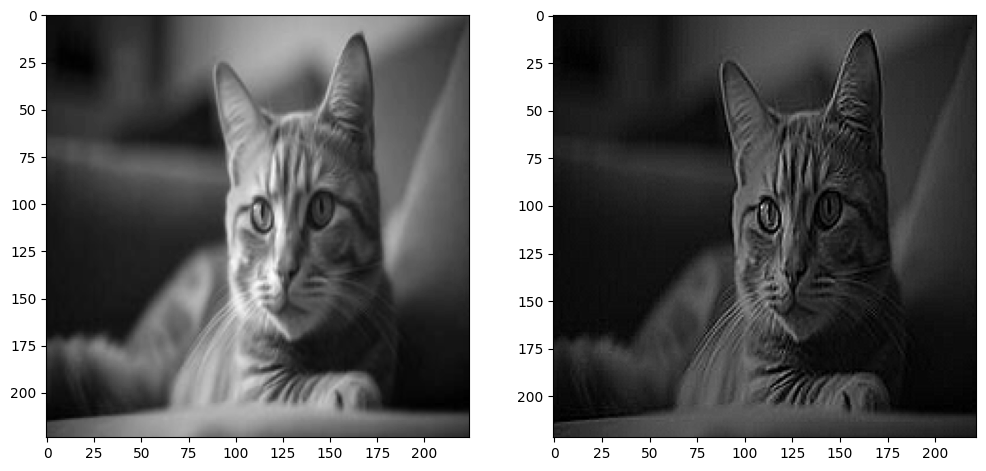

In [53]:
def negative_to_zero(img: np.array) -> np.array:
  
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i, j] < 0:
        img[i, j] = 0
  
  return img  
  '''
  Args:
    img: numpy array of image
  
  Returns:
    img: all values less than zero are assigned zero in original image
  '''
  # TODO: the sharpened image is a little dull, thats because some values in the sharpened image 
  # are less than zero
  # write a function that uses 0 as a threshold and converts all pixel values less than zero to zero

sharpened_zeroed = negative_to_zero(img_sharpened)  
plot_two_images(image_array, sharpened_zeroed)

# TODO: use the plot_two_images function to plot the original image and negative_to_zero sharpened image side by side

#### 1.1.f (1 point)

In [10]:
# TODO: use the convolved function & the blur filter to obtain a blurred image of your original input 
# TODO: print the blurred image array named img_blurred
# TODO: use the plot_two_images function to plot the original image and blurred image side by side

Blurred image array:
 [[15.     15.     15.     ... 59.0625 56.875  57.0625]
 [15.25   15.25   15.25   ... 55.625  54.     54.9375]
 [15.75   15.75   15.75   ... 52.375  51.4375 53.1875]
 ...
 [61.25   63.5625 65.625  ... 52.1875 51.     49.8125]
 [61.75   63.3125 64.8125 ... 49.     47.875  46.625 ]
 [62.6875 64.     65.5    ... 45.875  44.6875 43.4375]]


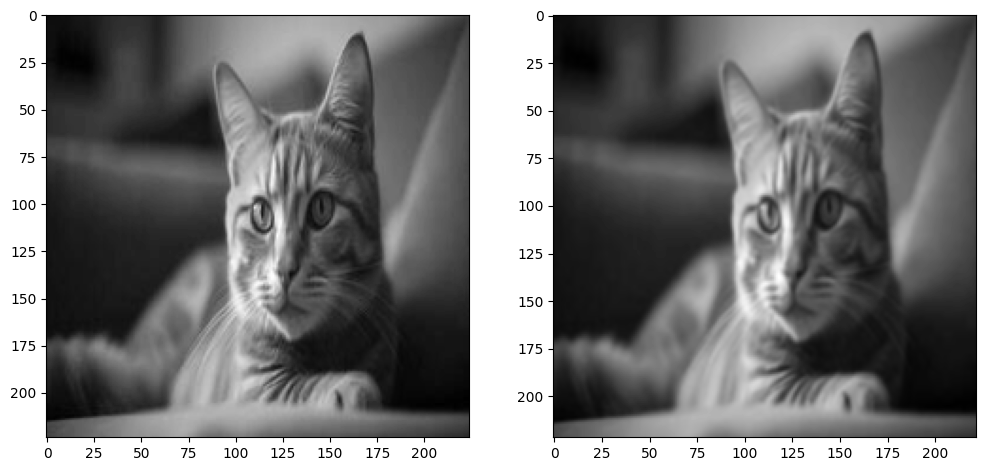

In [56]:
img_blurred = convolve(image_array, blur)
print("Blurred image array:\n", img_blurred)

plot_two_images(image_array, img_blurred)

In [11]:
# TODO: use the convolved function & the outline filter to obtain a outlined image of your original input 
# TODO: print the outlined image array named img_outlined
# TODO: use the plot_two_images function to plot the outlined image and original image side by side

Outlined image array:
 [[  0.   0.   0. ...  11. -11.   0.]
 [ -3.  -3.  -3. ...   4. -23.   0.]
 [  3.   3.   3. ...  -4. -18.  -2.]
 ...
 [  8.   6.  16. ...   9.   0.   3.]
 [-20. -17. -21. ...   1.   1.   4.]
 [ 27.  13.  18. ...   1.  -8.  -5.]]


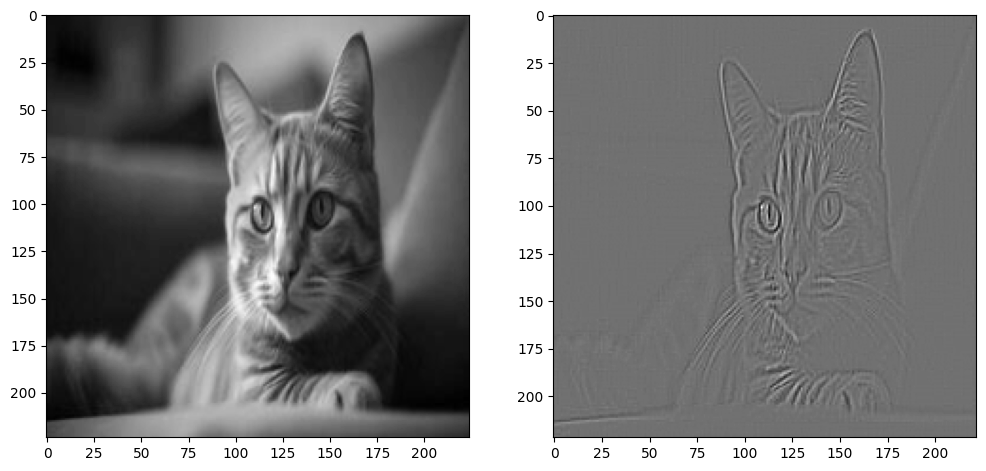

In [58]:
img_outlined = convolve(image_array, outline)
print("Outlined image array:\n", img_outlined)

plot_two_images(image_array, img_outlined)

**Reminder:** Padding is essentially a “black” border around the image. It’s black because the values are zeros, and zeros represent the color black. The black borders don’t have any side effects on the calculations, as it’s just a multiplication with zero.

#### 1.1.g (0.5 point)

In [59]:
def get_padding_width_per_side(kernel_size: int) -> int:
    '''
    Function that returns the number of pixels we need to 
    pad the image with on a single side, depending on the kernel size

    Args:
    kernel_size: filter size 

    Returns:
    padding_width 
    '''
    # TODO: simple integer division by 2

    padding_width = kernel_size // 2

    return padding_width

In [60]:
pad_3x3 = get_padding_width_per_side(3)
pad_5x5 = get_padding_width_per_side(5)
print("padding for kernel size 3 is", pad_3x3, "and padding for kernel size 5 is", pad_5x5)

padding for kernel size 3 is 1 and padding for kernel size 5 is 2


#### 1.1.h (1.5 points)

In [80]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    
    matrix_of_zeroes = np.zeros((img.shape[0] + padding_width*2, img.shape[1] + padding_width*2))

    matrix_of_zeroes[padding_width:matrix_of_zeroes.shape[0]-padding_width,
                     padding_width:matrix_of_zeroes.shape[1]-padding_width] = img

    img_with_padding = matrix_of_zeroes
    
    '''
    Function that adds padding to the image. 
    First, the function declares a matrix of zeros with a shape of image.shape + padding * 2. 
    The function then indexes the matrix so the padding is ignored and changes the zeros with the actual image values.

    Args:
      img: Original image numpy array
      padding_width: obtained in the get padding function earlier

    Returns:
      img_with_padding: padded image
    '''
    # TODO: take your image and a padding width as input and return the image with the padding added
    return img_with_padding

print("Original image with padding needed for a kernel of size 3:\n", 
      add_padding_to_image(image_array, get_padding_width_per_side(3)))

Original image with padding needed for a kernel of size 3:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 15. 15. ... 59. 60.  0.]
 [ 0. 15. 15. ... 57. 59.  0.]
 ...
 [ 0. 64. 65. ... 43. 42.  0.]
 [ 0. 59. 61. ... 41. 40.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


#### 1.1.i (1 point)

In the above function add_padding_to_image, explore the possible reason for the multiplication of padding_width by 2 in step 1

**Answer**: We did that because we had to add padding on both sides, and the padding_width only told us about the size of padding on one side. 

#### 1.1.j (0.5 point)

(226, 226)


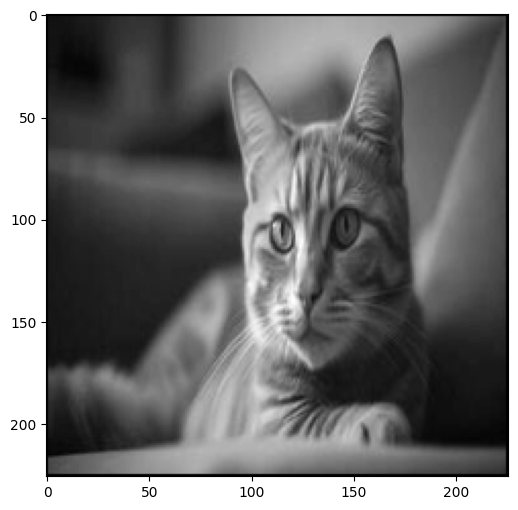

In [81]:
# TODO: use the add_padding_to_image function to obtain the padded image (kernel size of 3)
img_with_padding_3x3 = add_padding_to_image(image_array, get_padding_width_per_side(3))

print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

(228, 228)


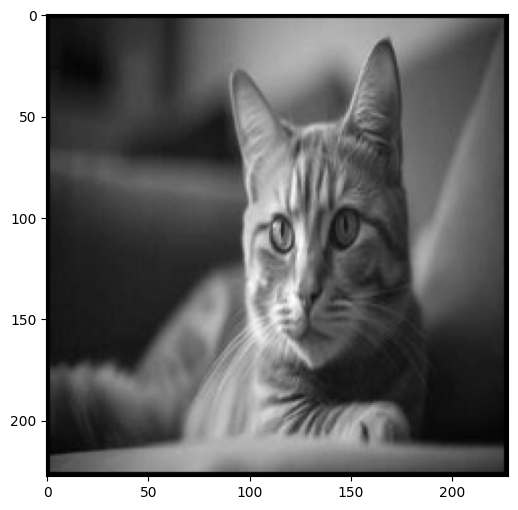

In [82]:
# TODO: use the add_padding_to_image function to obtain the padded image (kernel size of 5)
img_with_padding_5x5 = add_padding_to_image(image_array, get_padding_width_per_side(5))

print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)

#### 1.1.k (1 point)

In [17]:
# TODO: use the convolved function & the sharpen filter and negative to zero to obtain a sharpened image of your
# padded image (kernel size of 5) obtained from add_padding_to_image function 
# TODO: print the shape of the obtain sharpened image (obtained after padding)
# TODO: plot the original image and the sharpened image (obtained after padding) side by side using the
# plot_two_images function

Shape of the sharpened image after padding: (226, 226)


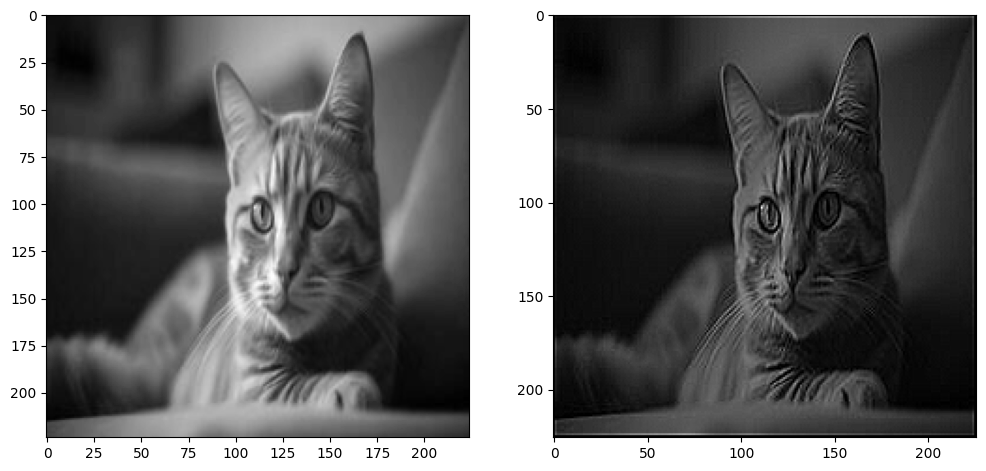

In [87]:
sharpened_padded_zeroed_image = negative_to_zero(convolve(img_with_padding_5x5, sharpen))
print("Shape of the sharpened image after padding:", sharpened_padded_zeroed_image.shape)

plot_two_images(image_array, sharpened_padded_zeroed_image)

### 1.2 Convolutional Layers (4 points)

We have a 3x5x5 image (3 channels) and three 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps.

**Hint:** An image tensor should be [batch size, channels, height, weight], kernels/filters tensor should be [number of filters (output channels), filter_size_1 (input channels), filter_size_2, filter_size_3].

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture1.png?raw=1">

What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for the following (a) - (d)

#### 1.2.a stride=1, padding = 0 (1 point)

In [107]:
import math

def calculate_feature_map_dimensions(img_size: int, kernel_size: int, depth: int, stride: int) -> tuple:
  
  output_size = math.floor((img_size - kernel_size) / stride) + 1  # Ensure correct rounding

  return depth, output_size, output_size

print("The dimensions of the feature maps after forward propagation will be:", calculate_feature_map_dimensions(img_size = 5, 
                                                                                kernel_size = 3,
                                                                                depth = 3,
                                                                                stride = 1))  

The dimensions of the feature maps after forward propagation will be: (3, 3, 3)


#### 1.2.b stride=2, padding = 1 (1 point) 

In [121]:
dummy_image = (np.zeros([5,5]) + 1)

dummy_image_with_padding = (add_padding_to_image(dummy_image, 1))

print("The dimensions of the feature maps after forward propagation will be:", calculate_feature_map_dimensions(img_size = dummy_image_with_padding.shape[0], 
                                                                                kernel_size = 3,
                                                                                depth = 3,
                                                                                stride = 2))  

The dimensions of the feature maps after forward propagation will be: (3, 3, 3)


#### 1.2.c stride=3, padding = 2 (1 point)

In [122]:
dummy_image_with_padding = (add_padding_to_image(dummy_image, 2))

print("The dimensions of the feature maps after forward propagation will be:", calculate_feature_map_dimensions(img_size = dummy_image_with_padding.shape[0], 
                                                                                kernel_size = 3,
                                                                                depth = 3,
                                                                                stride = 3))  

The dimensions of the feature maps after forward propagation will be: (3, 3, 3)


#### 1.2.d stride=1, dilation rate=2, and padding=0 (1 point) 

In [127]:
def image_dimensions_with_dilated_kernel(img_size: int, kernel_size: int, dilation: int, stride: int, depth = int):
  
    dilated_kernel_size = (kernel_size - 1) * dilation + 1

    output_size = math.floor((img_size - dilated_kernel_size) / stride) + 1
    
    return depth, output_size, output_size

print("The dimensions of the feature maps after forward propagation will be:", image_dimensions_with_dilated_kernel(img_size = dummy_image.shape[0], 
                                                                                kernel_size = 3,
                                                                                depth = 3,
                                                                                stride = 1,
                                                                                dilation = 2))  

The dimensions of the feature maps after forward propagation will be: (3, 1, 1)


### 1.3 Feature Dimensions of Convolutional Neural Network (4*0.5 points)

In this problem, we compute output feature shape of convolutional layers and pooling layers, which are building blocks of CNN. Let’s assume that input feature shape is C x W × H, where C is the number of channels, W is the width, and H is the height of input feature. 




#### 1.3.a (0.5 points)

A convolutional layer has 4 hyperparameters: the filter size(K), the padding size (P), the stride step size (S) and the number of filters (F). How many weights and biases are in this convolutional layer? And what is the shape of output feature that this convolutional layer produces?

Number of kernels we use $ = F$

Weights per filters $= C \times K \times K$

Total number of weights $= F \times C \times K \times K$

Total number of biases $= F$

**Shape of the output**:

$C, {\frac{(W + P) - K}{S}}+1, {\frac{(H + P) - K}{S}}+1$





#### 1.3.b (0.5 points)

A pooling layer has 2 hyperparameters: the stride step size(S) and the filter size (K). What is the output feature shape that this pooling layer produces?

**From the last part**:

$Width_{Convolve} =  {\frac{(W + P) - K}{S}}+1$

$Height_{Convolve} =  {\frac{(H + P) - K}{S}}+1$

**Shape of the output**:

$C, {\frac{Width_{Convolve} - K}{S}}+1, {\frac{Height_{Convolve} - K}{S}}+1$


#### 1.3.c (0.5 points)

Let’s assume that we have the CNN model which consists of L successive convolutional layers and the filter size is K and the stride step size is 1 for every convolutional layer. Then what is the receptive field size?

Receptive Field $= K + (L-1) \times (K-1)$







#### 1.3.d (0.5 points)

Consider a downsampling layer (e.g. pooling layer and strided convolution layer). In this problem, we investigate pros and cons of downsampling layer. This layer reduces the output feature resolution and this implies that the output features loose the certain amount of spatial information. Therefore when we design CNN, we usually increase the channel length to compensate this loss. For example, if we apply the max pooling layer with kernel size of 2 and stride size of 2, we increase the output feature size by a factor of 2. If we apply this max pooling layer, how much the receptive field increases? Explain the advantage of decreasing the output feature resolution with the perspective of reducing the amount of computation.

**Answer**: The receptive field doubles in size after each downsampling step. The advantage of using downsampling layers is that they reduce the size of the input feature maps to the next layer, while still preserving important information about the original image's features. Therefore, the smaller size of the input allows for faster computations. 

In [4]:
import torch
import torch.nn.functional as F

#Dummy image
x = torch.tensor([
    [[
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ]]
], dtype=torch.float32)

print("Original feature map:")
print(x.squeeze())  # Remove batch and channel dimension for readability

# Apply Max Pooling with kernel_size=2, stride=2
pooled_x = F.max_pool2d(x, kernel_size=2, stride=2)

print("\nPooled feature map:")
print(pooled_x.squeeze())

# Checking receptive field growth
receptive_field_size_before = 1  # Each pixel originally sees only itself
receptive_field_size_after = receptive_field_size_before * 2  # Doubles after pooling

print(f"\nReceptive field before pooling: {receptive_field_size_before}x{receptive_field_size_before}")
print(f"Receptive field after pooling: {receptive_field_size_after}x{receptive_field_size_after}")


Original feature map:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])

Pooled feature map:
tensor([[ 6.,  8.],
        [14., 16.]])

Receptive field before pooling: 1x1
Receptive field after pooling: 2x2


### 1.4 (6 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x5x5 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 3x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [4]:
# starter code to load image:x, kernel weights:w and bias:b
# if you hit errors related to the long data type convert the values in your numpy arrays to floats
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn

x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

# Making sure the shapes of the input and the filter match. 
print("Input image shape:", x.shape,
      "\nFilter shape:", w.shape, # Shape: (3, 3, 3, 3) (out_channels, in_channels, height, width)
      "\nBias shape:", b.shape)

#conv2d expects input in the form (batch_size, num_channels, height, width). However, our image has the size 3x5x5. 
#So we add another dimension for the batch using unsqueeze. 

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(0)  
w_tensor = torch.tensor(w, dtype=torch.float32)    
b_tensor = torch.tensor(b, dtype=torch.float32)  

print("\nInput tensor shape:", x_tensor.shape,
      "\nFilter tensor shape:", w_tensor.shape,
      "\nBias tensor shape:", b_tensor.shape)

conv_output = F.conv2d(x_tensor, 
                       w_tensor, 
                       bias=b_tensor, 
                       stride=1, 
                       padding=0)  

print(f"\nShape after convolution", conv_output.shape)
print("\nFeature maps after convolution:\n", conv_output)

# Apply Leaky ReLU activation function
activation_output = F.leaky_relu(conv_output, 
                                 negative_slope=0.01)  # Shape: (1, 3, 3, 3)

print("\nActivation output:\n", activation_output)


max_pool = nn.AdaptiveMaxPool2d((1,1))

# Apply Adaptive Max Pooling to get (3x1x1)
pooled_output = max_pool(activation_output) 

print("\nPooled output:\n", pooled_output)



Input image shape: (3, 5, 5) 
Filter shape: (3, 3, 3, 3) 
Bias shape: (3,)

Input tensor shape: torch.Size([1, 3, 5, 5]) 
Filter tensor shape: torch.Size([3, 3, 3, 3]) 
Bias tensor shape: torch.Size([3])

Shape after convolution torch.Size([1, 3, 3, 3])

Feature maps after convolution:
 tensor([[[[-13.,   5., -12.],
          [ -8.,  -2., -24.],
          [ 10.,  -8., -11.]],

         [[ 16.,  17.,  23.],
          [  5.,  37., -13.],
          [ 22.,  30.,  32.]],

         [[ 16.,   3., -15.],
          [  3.,   1.,  -8.],
          [  0.,  -1., -14.]]]])

Activation output:
 tensor([[[[-1.3000e-01,  5.0000e+00, -1.2000e-01],
          [-8.0000e-02, -2.0000e-02, -2.4000e-01],
          [ 1.0000e+01, -8.0000e-02, -1.1000e-01]],

         [[ 1.6000e+01,  1.7000e+01,  2.3000e+01],
          [ 5.0000e+00,  3.7000e+01, -1.3000e-01],
          [ 2.2000e+01,  3.0000e+01,  3.2000e+01]],

         [[ 1.6000e+01,  3.0000e+00, -1.5000e-01],
          [ 3.0000e+00,  1.0000e+00, -8.0000e-02],
  

### 1.5 (7 points)
Use the pytorch package to calculate feature/activation maps of a residual unit. Example of a residual unit are seen in figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as in the figure below.


<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture2.png?raw=1" width="150">

Write a code which takes 3x5x5 input image and performs two 2D convolution operations using the filters provided in the figure above. Please use the three 3x3x3 filters for the two Convolution layers. You need to set a suitable padding size for the convolution operations. After the convolution layers have the residual addition and use the ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

**Residual Unit** = $F(x) + x$ where $x$ is the input to the neural network, and $F(x)$ represents all the layers between the input and final activation function before it gets passed on to the ReLU function.

In [33]:
import torch.nn as nn

# Define the Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        
        super(ResidualBlock, self).__init__()
        self.convolution_layer = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)        
        self.ReLU_Layer = nn.ReLU()

    def forward(self, x):
        identity = x
        feature_map_1 = self.convolution_layer(x)
        activation_map_1 = self.ReLU_Layer(feature_map_1)
        feature_map_2 = self.convolution_layer(activation_map_1)
        feature_map_3 = feature_map_2 + identity
        final_activation_map = self.ReLU_Layer(feature_map_3)
        return feature_map_1, activation_map_1, feature_map_2, final_activation_map

In [34]:
residual_block = ResidualBlock(in_channels=x_tensor.shape[1], 
                               out_channels=x_tensor.shape[1], 
                               kernel_size=w_tensor.shape[2],
                               padding=1)

residual_block.convolution_layer.weight = nn.Parameter(w_tensor)
residual_block.convolution_layer.bias = nn.Parameter(b_tensor)

In [41]:
with torch.no_grad():
    print(f"\nFirst feature map:\n", residual_block(x_tensor)[0],"\n",
          "\nFirst activation map:\n", residual_block(x_tensor)[1],"\n",
          "\nSecond feature map:\n", residual_block(x_tensor)[2],"\n",
          "\nFinal activation map:\n",residual_block(x_tensor)[3])


First feature map:
 tensor([[[[  3.,  -6., -25.,  -1., -24.],
          [ -6., -13.,   5., -12., -15.],
          [ 22.,  -8.,  -2., -24., -12.],
          [  2.,  10.,  -8., -11.,  -5.],
          [  9.,   0., -10.,  17.,   0.]],

         [[  6.,  27.,  31.,  16.,  28.],
          [ 12.,  16.,  17.,  23.,  16.],
          [ 12.,   5.,  37., -13.,  32.],
          [ 18.,  22.,  30.,  32.,  14.],
          [  8.,  -9.,  23.,  -3.,  -2.]],

         [[-21.,  -7.,   0.,  -8.,  12.],
          [  0.,  16.,   3., -15., -14.],
          [-20.,   3.,   1.,  -8., -15.],
          [-27.,   0.,  -1., -14.,   1.],
          [  4.,  -3.,   6.,   2.,  -8.]]]]) 
 
First activation map:
 tensor([[[[ 3.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  5.,  0.,  0.],
          [22.,  0.,  0.,  0.,  0.],
          [ 2., 10.,  0.,  0.,  0.],
          [ 9.,  0.,  0., 17.,  0.]],

         [[ 6., 27., 31., 16., 28.],
          [12., 16., 17., 23., 16.],
          [12.,  5., 37.,  0., 32.],
          [18., 22

### 1.6 (2 points)
Describe the key design paramters of inception v3 (https://arxiv.org/pdf/1512.00567.pdf) and explain how it avoids overfitting of data.

**Answer**:

- **Factorized & Asymmetric Convolutions**: It uses asymmetric kernels and breaks down larger kernels into smaller ones to improve efficiency.

- **Auxilliary Classifiers**: The network has multiple classifiers along the way before reaching the final classifier. That helps the model learn when it's making incorrect predictions during the training and backpropagate to correct them. This helps in reducing overfitting because the model is penalized even before it has reached the final classifier layer. 

- **Label Smoothing**: Label smoothing helps the model in learning to generalize better becuase it reduces hard predictions down to softened probabilities.

- **Normalization**: Like any other model, normalization helps inception v3 avoid overfitting the data. 

## Question 2 Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 16x256x256 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. Please provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a.

**Hint:** See lab 4 for an example of how to make a class for a network (Implementing LeNet).


In [2]:
import torch

# starter code
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,16,256,256).normal_().type(torch.FloatTensor)

#### 2.1.a (2 points)
Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: let's call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 256 in a hidden layer and then to 128 in a hidden layer and finally feeds this vector to a fully connected layer to get the probability of 5 tissue classes. 

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Manually_Designed_Network(nn.Module):
    def __init__(self):
        super(Manually_Designed_Network, self).__init__()
        # Define layers
        self.input_layer = nn.Linear(in_features=16*256*256, 
                                     out_features=512)  
        
        self.hidden_layer_1 = nn.Linear(in_features=512, 
                                        out_features=256)
        
        self.hidden_layer_2 = nn.Linear(in_features=256, 
                                        out_features=128)

        self.output_layer = nn.Linear(in_features=128,
                                      out_features=5)  

    def forward(self, x):
        # Define the forward pass
        x = torch.flatten(x, start_dim=1)
        vectorize_image = self.input_layer (x)
        x1 = self.hidden_layer_1(vectorize_image)
        x2 = self.hidden_layer_2(x1)
        output = self.output_layer(x2)
        log_probs = F.log_softmax(output, dim=1)
        return (torch.exp(log_probs))


# Example of how to initialize the network
manually_designed_model = Manually_Designed_Network()

manually_designed_model(x)

tensor([[0.2263, 0.1930, 0.2171, 0.1991, 0.1645],
        [0.2063, 0.1770, 0.2238, 0.2116, 0.1812],
        [0.2059, 0.1918, 0.1860, 0.2154, 0.2008],
        [0.1991, 0.1972, 0.2020, 0.2236, 0.1781],
        [0.2209, 0.1650, 0.2280, 0.2093, 0.1768],
        [0.1979, 0.2135, 0.2188, 0.1967, 0.1730],
        [0.1930, 0.1975, 0.1972, 0.2276, 0.1846],
        [0.1821, 0.1988, 0.2424, 0.1920, 0.1848]], grad_fn=<ExpBackward0>)

#### 2.1.b (2 points)

Clearly mention the sizes for your input and output at each layer until you get final output vector with 5 tissue classes and an input of images of size 16x256x256.

The sizes of the input and output are as follows:

1. **Input layer**: input size is 1,048,576 and the output size is 512
2. **First hidden layer**: input size is 512 and the output size is 256
3. **Second hidden layer**: input size is 256 and the output size is 128
4. **Third hidden layer**: input size is 128 and the output size is 5

#### 2.1.c (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer (map to 64 after 128) will effect the number of parameters to use?

In [5]:
for name, param in manually_designed_model.named_parameters():
    print(f"Layer: {name}, Parameters: {param.numel()}\n")

#If we add another layer to the network, the number of parameters will increase. Below I am creating a new version of the model with the aforementioned layer. 

import torch.nn as nn

class One_More_Layer(nn.Module):
    def __init__(self):
        super(One_More_Layer, self).__init__()
        # Define layers
        self.input_layer = nn.Linear(in_features=16*256*256, 
                                     out_features=512)  
        
        self.hidden_layer_1 = nn.Linear(in_features=512, 
                                        out_features=256)
        
        self.hidden_layer_2 = nn.Linear(in_features=256, 
                                        out_features=128)
        
        self.hidden_layer_2 = nn.Linear(in_features=128, 
                                        out_features=64)


        self.output_layer = nn.Linear(in_features=64,
                                      out_features=5)  

    def forward(self, x):
        # Define the forward pass
        x = torch.flatten(x, start_dim=1)
        vectorize_image = self.input_layer (x)
        x1 = self.hidden_layer_1(vectorize_image)
        x2 = self.hidden_layer_2(x1)
        x3 = self.hidden_layer_3(x2)
        output = self.output_layer(x3)
        log_probs = F.log_softmax(output, dim=1)
        return (torch.exp(log_probs))

one_more_layer = One_More_Layer()

for name, param in one_more_layer.named_parameters():
    print(f"Model with an additional layer:\nLayer: {name}, Parameters: {param.numel()}")

Layer: input_layer.weight, Parameters: 536870912

Layer: input_layer.bias, Parameters: 512

Layer: hidden_layer_1.weight, Parameters: 131072

Layer: hidden_layer_1.bias, Parameters: 256

Layer: hidden_layer_2.weight, Parameters: 32768

Layer: hidden_layer_2.bias, Parameters: 128

Layer: output_layer.weight, Parameters: 640

Layer: output_layer.bias, Parameters: 5

Model with an additional layer:
Layer: input_layer.weight, Parameters: 536870912
Model with an additional layer:
Layer: input_layer.bias, Parameters: 512
Model with an additional layer:
Layer: hidden_layer_1.weight, Parameters: 131072
Model with an additional layer:
Layer: hidden_layer_1.bias, Parameters: 256
Model with an additional layer:
Layer: hidden_layer_2.weight, Parameters: 8192
Model with an additional layer:
Layer: hidden_layer_2.bias, Parameters: 64
Model with an additional layer:
Layer: output_layer.weight, Parameters: 320
Model with an additional layer:
Layer: output_layer.bias, Parameters: 5


#### 2.2.a (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 256 and then 128 (both with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 5 disease classes.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiseaseCNN(nn.Module):
    def __init__(self):
        super(DiseaseCNN, self).__init__()
        
        # First convolutional layer with 1 input channel (grayscale), and 16 output channels. 
        # The greater number of output channels help in enhancing the feature extraction of the model. 

        # The 16 here is basically the number of kernels we are using - since each kernel can learn different features, using more kernels means that we can learn more features.
        # For instance, there's one kernel to learn horizontal edges, one to learn vertical edges, one for textures and so on. 
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=1)
        
        # Second convolutional layer with 16 input channels, 32 output channels.
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, stride=1, padding=1)

        #Downsampling layer
        self.downsapling = nn.MaxPool3d(kernel_size=2, stride=2) 
        
        # Fully connected layer to output 5 disease class probabilities
        self.fc1 = nn.Linear(in_features= 32*4*64*64, #Because each downsampling layer is halving the dimensions. So the first layer halves 16 and 256. The second halves 8 and 128.
                             out_features = 128)  
        
        self.fc2 = nn.Linear(in_features = 128, 
                             out_features = 5)  # 5 classes output

    def forward(self, x):
        conv_1 = self.conv1(x)
        pool_1 = self.downsapling(conv_1)
        conv_2 = self.conv2(pool_1)
        pool_2 = self.downsapling(conv_2)
        x_flattened = torch.flatten(pool_2, 1)
        fc1_out = self.fc1(x_flattened)
        fc2_out = self.fc2(fc1_out)

        log_probs = F.log_softmax(fc2_out, dim=1)
        return (torch.exp(log_probs))

Disease_model = DiseaseCNN()

print(Disease_model(x))

tensor([[0.2624, 0.2316, 0.1264, 0.1474, 0.2322],
        [0.2859, 0.2277, 0.1183, 0.1473, 0.2208],
        [0.2886, 0.2306, 0.1189, 0.1344, 0.2275],
        [0.2752, 0.2264, 0.1131, 0.1427, 0.2426],
        [0.2761, 0.2340, 0.1118, 0.1395, 0.2385],
        [0.2877, 0.2311, 0.1188, 0.1300, 0.2323],
        [0.2852, 0.2350, 0.1208, 0.1348, 0.2242],
        [0.2542, 0.2426, 0.1114, 0.1519, 0.2399]], grad_fn=<ExpBackward0>)


### 2.2.b (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 5 probabilities.

**Size of the Input**: (8,1,16,256,256) - Here the batch size is 8, there's only 1 channel (grayscale), and then there's a 3D image with 16 depth, and 256 $\times$ 256 spatial size.

**Size After the First Covolution Layer**: (8,16,16,256,256) - The size remains the same because we are using padding of 1, with a stride of 1, and kernel size of 1. At this step, the number of output channels increase to 16.

**Size After the First Pooling Layer**: (8,16,8,128,128) - Because of the kernel size 2 and the stride of 2, the downsampling layer reduces the dimensions by half. 

**Size After the Second Covolution Layer**: (8,32,8,128,128) - The size does not change after the first pooling layer because at this layer we are using padding of 1, with a stride of 1, and kernel size of 1. At this step, the number of output channels increase to 32.

**Size After the Second Pooling Layer**: (8,32,4,64,64) - Because of the kernel size 2 and the stride of 2, the downsampling layer reduces the dimensions by half. 

**Size of the Input to the First Fully Connected Layer**: (32 $\times$ 4 $\times$ 64 $\times$ 64)

**Size of the Output of the First Fully Connected Layer**: 128

**Size of the Input to the Second Fully Connected Layer**: 128

**Size of the Output of the Second Fully Connected Layer**: 5

#### 2.2.c (1 point) 
How many parameters you need to fit for your design?

### 2.2.d (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution.

**Answer**: Larger kernel sizes allow us to look at a wider receptive field. This means that we need less layers to get the same level of receptive field as with a smaller kernel. However, we now have more parameters to compute so it might be more computationally intense. While smaller kernels look at smaller features and are *localized* so to speak, bigger kernels are more *global* in that they look at larger sections of the image and identify bigger patterns across the image.

### 2.3 (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

**Answer**: I would like to address three main differences that I observed: computation time, number of parameters, and architecture.

1. **Computation Time**: At least for me, the neural network with just fully connected layers ran faster than the convolutional neural network. 

2. **Number of Parameters**: Compared to fully connected layers, convolution layers have thousands of times smaller number of parameters.

3. **Architecture**: For a neural network using only fully connected layers, the architecture seems to be oversimplifying the image recognition task. Especially when we move to a 3D space. On the other hand, with convolutional layers, the ability to increase output channels at will allows us to learn weights that target specific features in the image. I think this is really helpful especially because it allows us to extract meaningful features all across the image. 

## Question 3 Literature Review: ChestX-ray8 (Total 19 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the goal of the task performed, the methods proposed, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe your answers in your own words.  

### 3.1 (2 points) 

What was the underlying goal of this paper? What were the challenges in detection of pneumonia that this paper aimed at solving? What was the key motivation?


**Answer**: The paper built a convolutional neural network with 121 layers to detect pneumonia. The challenge was that chest X-rays were the main form of diagnosis for pneumonia, however, expert practicing radiologists were required to interpret the X-rays and diagnose pneumonia. 

### 3.2  (3 points)
Describe the machine learning task (segmentation, classification, regression, etc?) that was attempted in this paper. Further describe the learning algorithm used (supervised, unsupervised, ..etc.) and the reason was using this algorithm.

**Answer**: The task was binary classification (and later multi-class classification) using supervised learning. 

### 3.3 (2.5 points)
How does the proposed architecture in this paper compare with the previous State of the art? Give details on the modifications and improvements, and reasons for why you think these worked.

**Answer**: The ChexNet model outperforms the previous state of the art models (Yao et al., 2017 and Wang et al., 2017), especially for diagnosing Mass, Nodule, Pneumonia, and Emphysema where the ChexnNet's per-class AUROC was >0.05 higher than the older models. 


### 3.4 (2 points)
Describe the CNN architecture used along with training details (a flow that explains the entire training process with details on the batch_size, optimizer, loss function, model weights, learning rate, etc). Also try to infer why were these paramters and hyperparamters chosen for this specific task.


**Answer**:

121 convolution layers, Adam, 0.001 Binary cross entropy loss


### 3.5 (2.5 points)

How was the model evaluated? What were the metrics utilized? List down reasons of using these metrics over all others.


**Answer**:

**Evaluation against radiologists**: The authors concluded that the model's performance was stastistically significantly better than radiologists. 


### 3.6 (2.5 points)

Explain model interpretation through class activation mapping. Discuss the role of Class Activation Maps (CAMs) in CheXNet.?

### 3.7 (2 points)
What was the kind of preprocessing the dataset went through? Explain reasons for each data transformation/preprocessing step.

### 3.8 (2.5 points)

In the paper CAMs (class activation mappings) are used for visualisation. Can this method be used for any CNN? Describe the architectural requirements for getting CAM visualisations.

## Question 4 Deep CNN design for disease classification (Total 36 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. Please read the HPC instruction first. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. If you run the HW2 jupter script with Squash File System and Singularity on GCP, you can find the data under /images folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017_v2020.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

### 4.1 Train, Test, and Validation Sets (0.5 point)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets (you do not need to think about splitting the sets based on subjects for this homework; in general, we do not want images from the same subject to appear in both train and test sets). 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Data_Entry_2017_v2020.csv")


def assign_class(label):
    if "Cardiomegaly" in label:
        return 0
    elif "Pneumothorax" in label:
        return 1
    elif "Infiltration" in label:
        return 2
    else:
        return -1  # Exclude other cases

df["Class"] = df["Finding Labels"].apply(assign_class)
df = df[df["Class"] != -1]

train, temp = train_test_split(df, test_size=0.3, stratify=df["Class"], random_state=42)
val, test = train_test_split(temp, test_size=2/3, stratify=temp["Class"], random_state=42)

train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)

#Normalizing helps in getting percentages. 
print("Train set distribution:\n", train["Class"].value_counts(normalize=True))
print("Validation set distribution:\n", val["Class"].value_counts(normalize=True))
print("Test set distribution:\n", test["Class"].value_counts(normalize=True))

Train set distribution:
 Class
2    0.695953
1    0.198929
0    0.105118
Name: proportion, dtype: float64
Validation set distribution:
 Class
2    0.695833
1    0.198864
0    0.105303
Name: proportion, dtype: float64
Test set distribution:
 Class
2    0.695949
1    0.198978
0    0.105074
Name: proportion, dtype: float64


### 4.2 Data preparation before training (2 points)
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided an incomplete dataloader code below. Please add your code and complete it.

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
    
        if len(image.shape) == 3 and image.shape[2] == 4:
            image = image[:, :, :3]
    
        # If the image is grayscale, convert to 3-channel by repeating along the last axis
        if image.ndim == 2:
            image = np.repeat(image[..., np.newaxis], 3, axis=-1)
        
        # Normalize the image
        image = image.astype('float32') / 255.0
    
        # Ensure the image has a single channel (batch, channels, depth, height, width)
        image = torch.tensor(image).permute(2, 0, 1)  # Adding channel dimension (1 channel)
        
        label = int(self.data_frame.iloc[idx, -1])  # Get the label
    
        # Ensure label is a tensor
        label = torch.tensor(label)
    
        # Return the dictionary
        sample = {'x': image, 'y': label}
    
        if self.transform:
            sample = self.transform(sample)
    
        return sample

### 4.3 CNN model definition (5 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 4 convolutional layers, 4 residual units (similar question 1.5) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  5x5 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers.

Define the number of feature maps in hidden layers as: 8, 16, 32, 64, 64, 64, 128 (1st layer, ..., 7th layer). 

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2025/blob/main/hws/hw2/medicalnet.png?raw=1" height="300">

Write a class which specifies this network details. 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Disease_Classification_CNN(nn.Module):
    def __init__(self, conv_kernel: int, res_kernel: int):

        super(Disease_Classification_CNN, self).__init__()
        
        #Main convolution layers
        self.conv1 = nn.Conv2d(in_channels = 3, 
                               out_channels = 8, 
                               kernel_size = conv_kernel, 
                               stride=2, 
                               padding=2)
        
        self.conv2 = nn.Conv2d(in_channels = 8, 
                               out_channels = 16, 
                               kernel_size = conv_kernel, 
                               stride=2, 
                               padding=2)
        
        self.conv3 = nn.Conv2d(in_channels = 16, 
                               out_channels = 32, 
                               kernel_size = conv_kernel, 
                               stride=2, 
                               padding=2)
        
        self.conv4 = nn.Conv2d(in_channels = 32, 
                               out_channels = 64, 
                               kernel_size = conv_kernel, 
                               stride=2, 
                               padding=2)

        
        #--------------------------------------------------------------
        
        #Residual unit convolution layers
        self.res_conv_1 = nn.Conv2d(in_channels = 8, 
                                    out_channels = 8, 
                                    kernel_size = res_kernel, 
                                    stride=1, 
                                    padding=2)

        self.res_conv_2 = nn.Conv2d(in_channels = 16, 
                                    out_channels = 16, 
                                    kernel_size = res_kernel, 
                                    stride=1, 
                                    padding=2)

        self.res_conv_3 = nn.Conv2d(in_channels = 32, 
                                    out_channels = 32, 
                                    kernel_size = res_kernel, 
                                    stride=1, 
                                    padding=2)
        
        self.res_conv_4 = nn.Conv2d(in_channels = 64, 
                                    out_channels = 64, 
                                    kernel_size = res_kernel, 
                                    stride=1, 
                                    padding=2)

        #--------------------------------------------------------------

        #Non-linearity
        self.relu = nn.ReLU()

        #Downsampling layer
        self.downsapling = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        #--------------------------------------------------------------

        #Can you please explain the math behind it? Like how do I get to this point for the number of input features for the fully connected layer?

        # Fully connected layer 
        self.fc1 = nn.Linear(in_features= 1024, #Because each downsampling layer is halving the dimensions. So the first layer halves 16 and 256. The second halves 8 and 128.
                             out_features = 128)  
        
        self.classification = nn.Linear(in_features = 128, 
                                        out_features = 3)  # 3 classes output

    def forward(self, x):
        
        #First convolutional layer
        #--------------------------------------------------------------
        x = self.conv1(x)
        x = self.relu(x)
        x = self.downsapling(x)

        #First residual unit
        #--------------------------------------------------------------

        identity = x
        x = self.res_conv_1(x)
        x = self.relu(x)
        x = self.res_conv_1(x)
        x = x + identity
        x = self.relu(x)

        #Second convolutional layer
        #--------------------------------------------------------------
        x = self.conv2(x)
        x = self.relu(x)
        x = self.downsapling(x)

        #Second residual unit
        #--------------------------------------------------------------
        identity = x
        x = self.res_conv_2(x)
        x = self.relu(x)
        x = self.res_conv_2(x)
        x = x + identity
        x = self.relu(x)

        #Third convolutional layer
        #--------------------------------------------------------------
        x = self.conv3(x)
        x = self.relu(x)
        x = self.downsapling(x)

        #Third residual unit
        #--------------------------------------------------------------
        identity = x
        x = self.res_conv_3(x)
        x = self.relu(x)
        x = self.res_conv_3(x)
        x = x + identity
        x = self.relu(x)

        #Fourth convolutional layer
        #--------------------------------------------------------------
        x = self.conv4(x)
        x = self.relu(x)
        x = self.downsapling(x)

        #Fourth residual unit
        #--------------------------------------------------------------
        identity = x
        x = self.res_conv_4(x)
        x = self.relu(x)
        x = self.res_conv_4(x)
        x = x + identity
        x = self.relu(x)

        #Fully connected layer
        #--------------------------------------------------------------
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = self.classification(x)
        log_probs = F.log_softmax(x, dim=1)
        return (torch.exp(log_probs))

Three_Disease_model = Disease_Classification_CNN(conv_kernel = 5,
                                                 res_kernel = 5)

Three_Disease_model

Disease_Classification_CNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (res_conv_1): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (res_conv_2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (res_conv_3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (res_conv_4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (downsapling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (classification): Linear(in_features=128, out_features=3, bias=True)
)

### 4.4 (2 point)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

In [3]:
for name, param in Three_Disease_model.named_parameters():
    print(f"\nLayer: {name}, Parameters: {param.numel()}")


Layer: conv1.weight, Parameters: 600

Layer: conv1.bias, Parameters: 8

Layer: conv2.weight, Parameters: 3200

Layer: conv2.bias, Parameters: 16

Layer: conv3.weight, Parameters: 12800

Layer: conv3.bias, Parameters: 32

Layer: conv4.weight, Parameters: 51200

Layer: conv4.bias, Parameters: 64

Layer: res_conv_1.weight, Parameters: 1600

Layer: res_conv_1.bias, Parameters: 8

Layer: res_conv_2.weight, Parameters: 6400

Layer: res_conv_2.bias, Parameters: 16

Layer: res_conv_3.weight, Parameters: 25600

Layer: res_conv_3.bias, Parameters: 32

Layer: res_conv_4.weight, Parameters: 102400

Layer: res_conv_4.bias, Parameters: 64

Layer: fc1.weight, Parameters: 131072

Layer: fc1.bias, Parameters: 128

Layer: classification.weight, Parameters: 384

Layer: classification.bias, Parameters: 3


### 4.5 Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now with default hyper-parmeters.

**Answer**: I think the cross entropy loss would be a good choice for a loss function because it's routinely used for classification problems. 

In [4]:
from torch import optim

optimizer = optim.Adam(Three_Disease_model.parameters(), 
                          lr=0.01) #Learning rate, 
    
loss_criterion = torch.nn.CrossEntropyLoss()

**Some background:** In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3 can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

### Custom Functions Block
Every function used downstream form this block will is present here to make things neater.

In [63]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchmetrics.classification import MulticlassAUROC, MulticlassROC
from sklearn.metrics import confusion_matrix
import itertools

def model_training(model, train_loader, criterion, learning_rate, epochs, device = None):

    losses = []

    optimizer = optim.Adam(model.parameters(), 
                          lr=learning_rate)
    
    # Return average loss for the epoch
    for i in range(epochs):

        loss_per_batch = 0
        
        for sample in train_loader:

            if device != None:
                x = sample['x'].to(device)
                y = sample['y'].to(device)
    
            if device == None:
                x = sample['x']
                y = sample['y']

            
            y_pred = model(x) #Forward pass

            loss = criterion(y_pred, y) #Read more about squeeze

            loss.backward() #Backward pass

            optimizer.step() #Update the weights

            optimizer.zero_grad() #Reseting the weights to 0

            loss_per_batch = loss_per_batch + loss.item()

        losses.append(loss_per_batch/len(train_loader))

        if not i % (epochs/10):
            print(f"Average training loss for epoch {i}: {losses[i]}")
    

    return losses        

#-------------------------------------------------

def model_testing(model, test_loader, criterion, device = None):

    losses = []
    correct = []
    index = 0
    predictions = []
    true_y = []
    probabilities = []  #We will use this for ROC curve
    average_loss_printed = 0

    
    model.eval()  # Set the model to evaluation mode -- Read more about this

    with torch.no_grad():

        for sample in test_loader:

            if device != None:
                x = sample['x'].to(device)
                y = sample['y'].to(device)
    
            if device == None:
                x = sample['x']
                y = sample['y']
                
            y_pred = model(x) #Forward pass

            y_pred_probs = torch.softmax(y_pred, dim=1)

            probabilities.append(y_pred_probs)

            #print(f"y_pred shape: {y_pred.shape}, y shape: {y.shape}")

            loss = criterion(y_pred, y) #Read more about squeeze

            losses.append([loss.item(), index])

            preds = torch.argmax(y_pred, dim=1)

            predictions.append(preds)

            true_y.append(y)
            
            correct_preds = (preds == y).sum().item()

            correct.append([correct_preds, index])
            
            index = index + 1

            #print("Batch:", index, "Loss:", loss.item(), "Correct:", correct_preds, "Wrong:", len(y)-(correct_preds))

            average_loss_printed += loss.item()

    #print("Average loss for the test set:", average_loss_printed/len(test_loader))

    probabilities = torch.cat(probabilities)

    predictions = torch.cat(predictions)

    true_y = torch.cat(true_y)

    return predictions, true_y, probabilities, (average_loss_printed/len(test_loader))

#------------------------------------

def reset_weights(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

#-----------------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

#def cm(y_true, y_pred):
#    cnf_matrix = confusion_matrix(y_true, y_pred)
#    np.set_printoptions(precision=2)
#    plt.figure()
#    class_names = ['0: Cardiomegaly','1: Pneumothorax','2: Infiltration']
#    plot_confusion_matrix(cnf_matrix, classes=class_names,
#                          title='Confusion matrix')

from sklearn.metrics import confusion_matrix

def cm(y_true, y_pred):
    # Specify the label order explicitly.
    label_order = [0, 1, 2]
    cnf_matrix = confusion_matrix(y_true, y_pred, labels=label_order)
    np.set_printoptions(precision=2)
    plt.figure()
    class_names = ['0: Cardiomegaly','1: Pneumothorax','2: Infiltration']
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

### 4.6 Train the network on a subset (5 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [150]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 Class
1    158
0     72
Name: count, dtype: int64
Selected subset class frequencies
 Class
1    20
0    13
Name: count, dtype: int64


Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs).

In [19]:
# Define paths
train_csv = "HW2_randomTrainSet.csv"
val_csv = "HW2_randomValidationSet.csv"
root_dir = "/scratch/ma8308/Deep_Learning/HW2/images/images/"

# Create dataset objects
train_dataset_subset = ChestXrayDataset(train_csv, root_dir)
val_dataset_subset = ChestXrayDataset(val_csv, root_dir)

# Create DataLoaders
train_loader_subset = DataLoader(train_dataset_subset, batch_size=32, shuffle=True, num_workers=14)
val_loader_subet = DataLoader(val_dataset_subset, batch_size=32, shuffle=False, num_workers=14)

In [ ]:
epochs_for_nn = 10
learning_rate_for_nn = 0.01
gpu = torch.device('cuda:0')

reset_weights(Three_Disease_model)

average_losses = model_training(model = Three_Disease_model.to(gpu), 
                                train_loader = train_loader_subset, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = learning_rate_for_nn, 
                                epochs = epochs_for_nn,
                                device = gpu)

import matplotlib.pyplot as plt

# Create figure and axis for better visualization
plt.plot(range(epochs_for_nn), 
         average_losses, 
         color='darkmagenta')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Average Loss for each Epoch")

# Display the plot
plt.show()

In [184]:
subset_predictions = model_testing(model = Three_Disease_model.to(gpu), 
                                   test_loader = val_loader_subet, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

print(f"The average loss for the test set is: {subset_predictions[3]}")

The average loss for the test set is: 1.2389448583126068


### 4.7 Analysis of training using a CNN model (2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 15?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

**Answer**: The model does not seem to have enough capacity to learn; there's huge variations in the loss reported for each epoch. Some of the ways that we could try to improve the learning capacity was using a weighted loss function (I tried it but it didn't work - data not shown), or give it a larger subset of the data. 

- Let's try increasing the learning rate by 15 times to see how it changes the average loss plot:

In [ ]:
epochs_for_nn = 10
learning_rate_for_nn = 0.01
gpu = torch.device('cuda:0')

reset_weights(Three_Disease_model)

average_losses = model_training(model = Three_Disease_model.to(gpu), 
                                train_loader = train_loader_subset, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = learning_rate_for_nn*15, 
                                epochs = epochs_for_nn,
                                device = gpu)

import matplotlib.pyplot as plt

# Create figure and axis for better visualization
plt.plot(range(epochs_for_nn), 
         average_losses, 
         color='darkmagenta')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Average Loss for each Epoch with 15 x Learning Rate")

# Display the plot
plt.show()

In [187]:
subset_predictions_15_lr = model_testing(model = Three_Disease_model.to(gpu), 
                                   test_loader = val_loader_subet, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

print(f"The average loss for the test set is: {subset_predictions_15_lr[3]}")

The average loss for the test set is: 1.2389448583126068


The model seems to be learning just as bad as before with 15 $\times$ the learning rate.

**Additionally:** The random subset of data only has 2 classes, however, the model is trained to output three classes. That could explain why it's not able to learn very well, because while it expects outputs of three classes, its loss function might be penalizing it over and over for predicting the third class when  in fact it should only output 2 classes. Therefore, if we change the output to 2 classes perhaps the model would learn better. 

### 4.8 Hyperparameters (2.5 points)
Now, we will revisit our selection of CNN model architecture, training parameters and so on: i.e. hyperparameters. In your investigations, define how you will change the hyperparameter in the light of model performance using previous hyperparameters. Provide your rationale choosing the next hyperparameter. Provide learning loss and accuracy curves, and model performance in HW2_randomValidationSet. You will use macro AUC as the performance metric for comparing CNN models for disease classification task.  Report macro AUC for each CNN model with different hyperparameters (Check http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings).

Investigate the effect of learning rate and batch size in the model performance (try atleast 5 learning rates and 3 batch sizes) and select optimal values for both. You only need to put your best result here.

In [ ]:
epochs_for_nn = 5
gpu = torch.device('cuda:0')
num_classes = 3
roc_metric = MulticlassROC(num_classes=num_classes, average=None)
auroc_metric = MulticlassAUROC(num_classes=num_classes, average=None)

#------------------------------------------------------------------

learning_rate_array = np.array([0.001, 0.01, 0.15, 1.5, 15])

for i in range(len(learning_rate_array)):

    reset_weights(Three_Disease_model)

    print(f"\nTraining model at the learning rate: {learning_rate_array[i]} with the batch size of 32")

    average_losses = model_training(model = Three_Disease_model.to(gpu), 
                                train_loader = train_loader_subset, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = learning_rate_array[i], 
                                epochs = epochs_for_nn,
                                device = gpu)

    print(f"Testing model trained at the learning rate: {learning_rate_array[i]}")

    lr_tuning_predictions = model_testing(model = Three_Disease_model.to(gpu), 
                                   test_loader = val_loader_subet, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

    auroc_lr = auroc_metric(lr_tuning_predictions[2].to("cpu"), lr_tuning_predictions[1].to("cpu"))


    print(f"The average loss for the test set at the learning rate {learning_rate_array[i]} is: {lr_tuning_predictions[3]}")
    print(f"The AUROC for the test set at the learning rate {learning_rate_array[i]} is: {np.mean(np.array(auroc_lr))}")
    print("---------------------------------------------------------")

#------------------------------------------------------------------

batch_size_array = np.array([16, 32, 64, 128, 256]) #Data loader only accepts integers. 

for i in range(len(batch_size_array)):

    tuning_train_loader_subset = DataLoader(train_dataset_subset, batch_size=int(batch_size_array[i]), shuffle=True, num_workers=14)
    tuning_val_loader_subet = DataLoader(val_dataset_subset, batch_size=int(batch_size_array[i]), shuffle=False, num_workers=14)

    reset_weights(Three_Disease_model)

    print(f"\nTraining model at the batch size of: {batch_size_array[i]} with a learning rate of 0.01")

    average_losses = model_training(model = Three_Disease_model.to(gpu), 
                                train_loader = tuning_train_loader_subset, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = 0.01, 
                                epochs = epochs_for_nn,
                                device = gpu)

    print(f"Testing model trained at the batch size of: {batch_size_array[i]}")

    batch_tuning_predictions = model_testing(model = Three_Disease_model.to(gpu), 
                                   test_loader = tuning_val_loader_subet, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

    auroc_batch = auroc_metric(batch_tuning_predictions[2].to("cpu"), batch_tuning_predictions[1].to("cpu"))
    
    print(f"The average loss for the test set at the learning rate {batch_size_array[i]} is: {batch_tuning_predictions[3]}")
    print(f"The AUROC for the test set at the batch size {batch_size_array[i]} is: {np.mean(np.array(auroc_batch))}")
    print("---------------------------------------------------------")

### 4.9 Train the network on the whole dataset (4 points)
After question 4.7, you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Use the best batch size and learning rate from 4.8. Train your network on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

In [97]:
def assign_class(label):
    if "Cardiomegaly" in label:
        return 0
    elif "Pneumothorax" in label:
        return 1
    elif "Infiltration" in label:
        return 2
    else:
        return 3 

train_csv = "HW2_trainSet_new.csv"
val_csv = "HW2_validationSet_new.csv"
test_csv = "HW2_testSet_new.csv"
root_dir = "/scratch/ma8308/Deep_Learning/HW2/images/images/"

train_df = pd.read_csv(train_csv)
train_df["Class"] = train_df["Finding Labels"].apply(assign_class)

val_df = pd.read_csv(val_csv)
val_df["Class"] = val_df["Finding Labels"].apply(assign_class)

test_df = pd.read_csv(test_csv)
test_df["Class"] = test_df["Finding Labels"].apply(assign_class)

train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)
test_df.to_csv(test_csv, index=False)

In [29]:
train_csv = "HW2_trainSet_new.csv"
val_csv = "HW2_validationSet_new.csv"
test_csv = "HW2_testSet_new.csv"
root_dir = "/scratch/ma8308/Deep_Learning/HW2/images/images/"

# Create dataset objects
full_train_dataset = ChestXrayDataset(train_csv, root_dir)
full_val_dataset = ChestXrayDataset(val_csv, root_dir)

# Create DataLoaders
full_train_loader = DataLoader(full_train_dataset, batch_size=64, shuffle=True, num_workers=14)
full_val_loader = DataLoader(full_val_dataset, batch_size=64, shuffle=False, num_workers=14)

In [30]:
print('Training set class frequencies\n',pd.read_csv(train_csv)['Class'].value_counts())
print('Validation set class frequencies\n',pd.read_csv(val_csv)['Class'].value_counts())
print('Test set class frequencies\n',pd.read_csv(test_csv)['Class'].value_counts())

Training set class frequencies
 Class
2    6541
1    1495
0     773
Name: count, dtype: int64
Validation set class frequencies
 Class
2    1025
1     208
0     128
Name: count, dtype: int64
Test set class frequencies
 Class
2    1981
1     491
0     192
Name: count, dtype: int64


In [15]:
gpu = torch.device('cuda:0')

class_counts = torch.tensor([pd.read_csv(train_csv)['Class'].value_counts()[0],
                           pd.read_csv(train_csv)['Class'].value_counts()[1],
                           pd.read_csv(train_csv)['Class'].value_counts()[2]])

class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()  # Normalize weights
print("Class Weights:", class_weights)

weighted_cross_entropy_loss = torch.nn.CrossEntropyLoss(weight=class_weights.to(gpu))

Class Weights: tensor([0.6115, 0.3162, 0.0723])


In [ ]:
gpu = torch.device('cuda:0')
epochs_for_nn = 10
learning_rate_for_nn = 0.01

reset_weights(Three_Disease_model)

average_losses = model_training(model = Three_Disease_model.to(gpu), 
                                train_loader = full_train_loader, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = learning_rate_for_nn, 
                                epochs = epochs_for_nn,
                                device = gpu)

import matplotlib.pyplot as plt

# Create figure and axis for better visualization
plt.plot(range(epochs_for_nn), 
         average_losses, 
         color='darkmagenta')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Average Loss for each Epoch")

# Display the plot
plt.show()

In [18]:
class_counts_val = torch.tensor([pd.read_csv(val_csv)['Class'].value_counts()[0],
                           pd.read_csv(val_csv)['Class'].value_counts()[1],
                           pd.read_csv(val_csv)['Class'].value_counts()[2]])

class_weights_val = 1.0 / class_counts_val
class_weights_val = class_weights_val / class_weights_val.sum()  # Normalize weights
print("Class Weights:", class_weights_val)

weighted_cross_entropy_loss_val = torch.nn.CrossEntropyLoss(weight=class_weights_val.to(gpu))

Class Weights: tensor([0.5746, 0.3536, 0.0718])


In [32]:
full_val_predictions = model_testing(model = Three_Disease_model.to(gpu), 
                                         test_loader = full_val_loader, 
                                         criterion = torch.nn.CrossEntropyLoss(),
                                     device = gpu)

print(f"The average loss for the validation set is: {full_val_predictions[3]}")

The average loss for the validation set is: 0.797935583374717


Since the training and validation losses are pretty close, it would suggest that the model is fitting the data, and not overfitting it. However, we can regularize the model to further reduce the loss. 

### 4.10 Experiments with Resnet18

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf .

#### 4.10.a (2 Point)

What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?

**Answer**: This makes the 3 $\times$ 3 layer the bottleneck. The 1 $\times$ 1 layer reduces the dimensionality. And since there's only 1 parameter in the kernel, the process is fast. The 3 $\times$ 3 layer then has a lower dimension map to work on because the 1 $\times$ 1 layer extracts all the important information while reducing the dimensions. This way, the computations take less time and improve the efficiency of the model. 

#### 4.10.b Train the ResNet18 on the whole dataset

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [8]:
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder

# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        
        if image.ndim == 3 and image.shape[2] == 4:
            image = image[:, :, :3]
    
    # If the image is grayscale, convert to 3-channel by repeating along the last axis
        if image.ndim == 2:
            image = np.repeat(image[..., np.newaxis], 3, axis=-1)
        

        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    # Define the explicit mapping. Adjust the keys if needed.
    class_mapping = {"Cardiomegaly": 0, "Pneumothorax": 1, "Infiltration": 2}
    data['Class'] = data['Finding Labels'].map(class_mapping)
    return data

#### 4.10.c Architecture modification (4.5 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

In [34]:
from torchvision import models
import torch
import torch.nn as nn
import torch.nn.functional as F


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18 model
resnet_18 = models.resnet18(weights=None)  # No pre-training
num_ftrs = resnet_18.fc.in_features  # Get number of input features for FC layer

# Modify last fully connected layer for our dataset
num_classes = 3
resnet_18.fc = nn.Linear(num_ftrs, num_classes)

resnet_18 = resnet_18.to(device)

#### 4.10.d Train the network on the whole dataset (4.5 points)
Similar to question 4.7 train the model you developed in question 4.10.b on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import os
import numpy as np

train_csv = "HW2_trainSet_new.csv"
val_csv = "HW2_validationSet_new.csv"
test_csv = "HW2_testSet_new.csv"
root_dir = "/scratch/ma8308/Deep_Learning/HW2/images/images/"

# Load datasets
resnet_train_dataset = ChestXrayDataset_ResNet(csv_file=train_csv, root_dir=root_dir, transform=train_transform)
resnet_val_dataset = ChestXrayDataset_ResNet(csv_file=val_csv, root_dir=root_dir, transform=validation_transform)

# Create data loaders
batch_size = 64
resnet_train_loader = DataLoader(resnet_train_dataset, batch_size=batch_size, shuffle=True)
resnet_val_loader = DataLoader(resnet_val_dataset, batch_size=batch_size, shuffle=False)

In [14]:
for sample in resnet_train_loader:
    print(sample['x'].shape)

FileNotFoundError: No such file: '/scratch/ma8308/Deep_Learning/HW2/images/images/00019339_000.png'

Average training loss for epoch 0: 0.7774977882703146
Average training loss for epoch 1: 0.7478993452977443
Average training loss for epoch 2: 0.741501639286677
Average training loss for epoch 3: 0.7377540136592976
Average training loss for epoch 4: 0.734844505354978
Average training loss for epoch 5: 0.7340688329675923
Average training loss for epoch 6: 0.7349451547083647
Average training loss for epoch 7: 0.7324180279089056
Average training loss for epoch 8: 0.7329977897630222
Average training loss for epoch 9: 0.7316624479017396


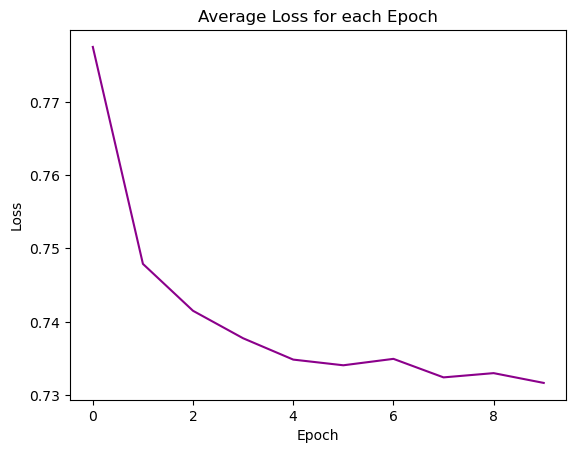

In [36]:
gpu = torch.device('cuda:0')

epochs_for_nn = 10
learning_rate_for_nn = 0.01

average_losses = model_training(model = resnet_18, 
                                train_loader = resnet_train_loader, 
                                criterion = torch.nn.CrossEntropyLoss(), 
                                learning_rate = learning_rate_for_nn, 
                                epochs = epochs_for_nn,
                                device = gpu)

import matplotlib.pyplot as plt

# Create figure and axis for better visualization
plt.plot(range(epochs_for_nn), 
         average_losses, 
         color='darkmagenta')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Average Loss for each Epoch")

# Display the plot
plt.show()

In [45]:
resnet_predictions = model_testing(model = resnet_18, 
                                   test_loader = resnet_val_loader, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

print(f"The average loss for the validation set is: {resnet_predictions[3]}")

The average loss for the validation set is: 0.718514388257807


The ResNet18 model seems to be fitting the data better than the CNN that we created above. Since the loss for the training and the validation set is pretty similar, it suggests that the model is not overfitting. 

However, we can try regularization to improve the model's performance. We can also use a weighted loss function because there's a large class imbalance (I tried it but it didn't work - data not shown). 

Additionally, we can try modifying the architecture a little to add additional layers, non-linearity, and perhaps even auxilliary classifiers to improve the model's prediction.

## Question 5 Analysis of the results from two networks trained on the full dataset (Total 5 points)
Use the validation loss to choose models from question 4.9 (model1) and question 4.10 (model2) (these models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

### 5.1 Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet_new.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2.

In [46]:
root_dir = "/scratch/ma8308/Deep_Learning/HW2/images/images/"
test_csv = "HW2_testSet_new.csv"

#----
my_model_test_dataset = ChestXrayDataset(test_csv, root_dir)
my_model_test_loader = DataLoader(my_model_test_dataset, batch_size=64, shuffle=False, num_workers=14)

#------

# Load datasets
ResNet_test_dataset = ChestXrayDataset_ResNet(csv_file=test_csv, root_dir=root_dir, transform=train_transform)
ResNet_test_loader = DataLoader(ResNet_test_dataset, batch_size=64, shuffle=False, num_workers=14)

In [47]:
class_counts_test = torch.tensor([pd.read_csv(test_csv)['Class'].value_counts()[0],
                           pd.read_csv(test_csv)['Class'].value_counts()[1],
                           pd.read_csv(test_csv)['Class'].value_counts()[2]])

class_weights_test = 1.0 / class_counts_test
class_weights_test = class_weights_test / class_weights_test.sum()  # Normalize weights
print("Class Weights:", class_weights_test)

weighted_cross_entropy_loss_test = torch.nn.CrossEntropyLoss(weight=class_weights_test.to(gpu))

Class Weights: tensor([0.6721, 0.2628, 0.0651])


In [48]:
full_test_predictions = model_testing(model = Three_Disease_model.to(gpu), 
                                         test_loader = my_model_test_loader, 
                                         criterion = torch.nn.CrossEntropyLoss(),
                                     device = gpu)

print(f"\nThe average loss of my CNN model for the test set is: {full_test_predictions[3]}")


The average loss of my CNN model for the test set is: 0.8073229179495857


In [68]:
resnet_predictions_test = model_testing(model = resnet_18, 
                                   test_loader = ResNet_test_loader, 
                                   criterion = torch.nn.CrossEntropyLoss(),
                                   device = gpu)

print(f"\nThe average loss of ResNet for the test set is: {resnet_predictions_test[3]}")


The average loss of ResNet for the test set is: 0.7137855404899234


#### ROC for the CNN I created

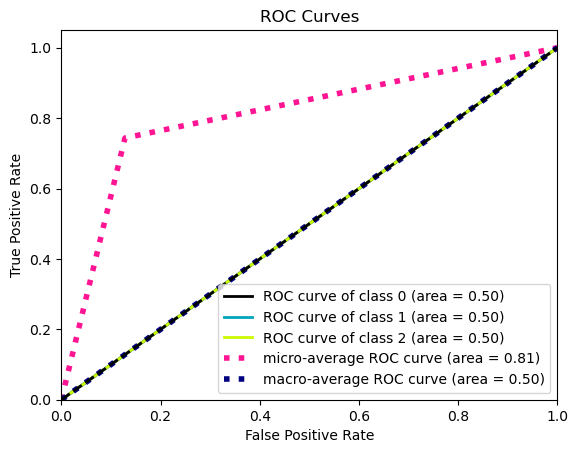

In [41]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = full_test_predictions[1].to("cpu")
y_probas = full_test_predictions[2].to("cpu")
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

#### ROC for ResNet18

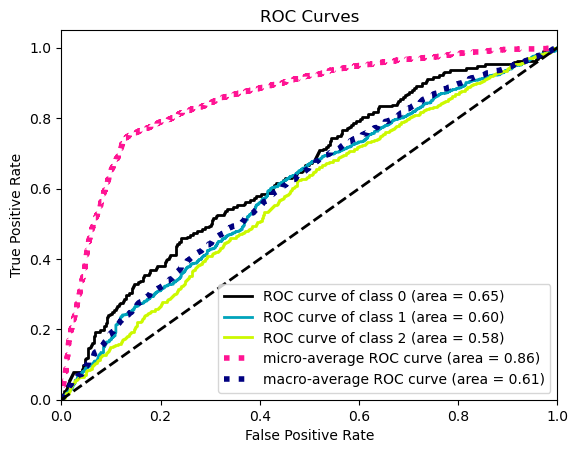

In [69]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = resnet_predictions_test[1].to("cpu")
y_probas = resnet_predictions_test[2].to("cpu")
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

#### Confusion Matrix for ResNet18

In [ ]:
cm(resnet_predictions_test[0].to("cpu"), resnet_predictions_test[1].to("cpu"))

#### Confusion Matrix for the CNN I created

In [ ]:
cm(full_test_predictions[0].to("cpu"), full_test_predictions[1].to("cpu"))